<a href="https://colab.research.google.com/github/my9oso6gqm/my9oso6gqm.github.io/blob/main/varie/temp/1/trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Recupero dati da Binance

In [2]:
!pip install binance-connector

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 4.8 MB/s 
     |████████████████████████████████| 3.1 MB 50.6 MB/s 
     |████████████████████████████████| 55 kB 4.4 MB/s 
     |████████████████████████████████| 396 kB 43.6 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 4.0 MB 43.1 MB/s 
     |████████████████████████████████| 74 kB 3.8 MB/s 
     |████████████████████████████████| 251 kB 57.9 MB/s 
  Created wheel for autobahn: filename=autobahn-22.4.2-cp37-cp37m-linux_x86_64.whl size=580332 sha256=c5ebf2440b7d4619010c61415581d594b6d946d101c16b905c353b7498851518
  Stored in directory: /root/.cache/pip/wheels/ec/0b/fc/7cf072cb66e08c9365e03420a6447aa45da6f70dd4b08b223c
Successfully built autobahn
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstal

In [3]:
from binance.spot import Spot as Client
import pandas as pd

In [4]:
## Recupero dalle Api di Binance i dati di Cardano
spot_client = Client(base_url="https://api.binance.com")
data = spot_client.klines("ADAUSDT", "1m", limit=100)

In [5]:
## Converto la risposta delle Api in un Dataframe di Pandas
df = pd.DataFrame(data)

In [6]:
## Stampo il Dataframe
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1654064100000,0.60520000,0.60550000,0.60460000,0.60510000,378595.30000000,1654064159999,229071.67654000,217,137999.80000000,83509.39083000,0
1,1654064160000,0.60520000,0.60520000,0.60360000,0.60370000,111490.00000000,1654064219999,67387.55404000,152,28065.00000000,16955.13090000,0
2,1654064220000,0.60370000,0.60370000,0.60240000,0.60280000,57898.40000000,1654064279999,34914.20366000,138,17048.40000000,10279.99684000,0
3,1654064280000,0.60290000,0.60360000,0.60290000,0.60330000,68028.60000000,1654064339999,41034.28247000,133,28568.60000000,17230.31968000,0
4,1654064340000,0.60320000,0.60380000,0.60300000,0.60370000,125524.60000000,1654064399999,75727.26427000,139,66008.10000000,39826.78695000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1654069800000,0.60580000,0.60640000,0.60540000,0.60640000,82661.20000000,1654069859999,50074.25692000,128,42593.00000000,25805.19340000,0
96,1654069860000,0.60650000,0.60720000,0.60590000,0.60710000,93587.90000000,1654069919999,56774.61861000,144,59347.70000000,36007.94013000,0
97,1654069920000,0.60720000,0.60720000,0.60540000,0.60630000,309568.60000000,1654069979999,187593.02061000,295,49442.30000000,29971.99937000,0
98,1654069980000,0.60640000,0.60650000,0.60510000,0.60550000,69588.00000000,1654070039999,42136.92928000,119,39652.80000000,24011.16623000,0


In [7]:
## Converto il Timestamp in Datatime
df[0] = (pd.to_datetime(df[0],unit='ms'))

In [8]:
## Elimino le colonne che non uso
df = df.drop(columns=[6, 7, 8, 9, 10, 11])

In [9]:
## Do dei nomi alle colonne
df.columns = ['date', 'open', 'high', 'low', 'close', 'volume']

In [10]:
## Grafico chiusure di Cardano

In [11]:
import matplotlib.pyplot as plt

In [12]:
## Converto il formato della colonna Close
df["close"] = df["close"].astype(float)

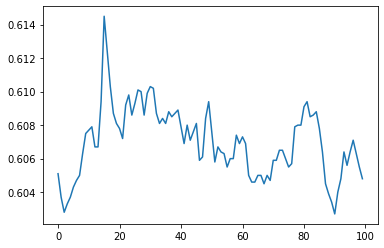

In [13]:
## Grafico la colonna Close
df["close"].plot()

In [14]:
## Media mobile

$$SMA = \frac{\sum_{i=1}^{N}Pi}{N}$$

In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
cardano_data = df # Da sistemare a monte

In [ ]:
## Creo una funzione che crea un Dataframe e calcolo la mobile mobile.
## Come parametri vuole un Dataframe (Con colonna close) e il periodo della
## media mobile

In [41]:
def media_mobile(dati, window):
    segnali = pd.DataFrame(index=dati.index)
    segnali['chiusura'] = dati['close']
    segnali['media mobile'] = dati['close'].rolling(window=window,min_periods=1, center=False).mean()
    return segnali

mm=media_mobile(cardano_data,5)

In [ ]:
## Grafico la colonna close e la colonna media mobile

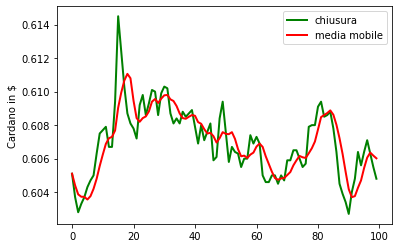

In [42]:
chiusura_plot = mm['chiusura']
mm_plot = mm['media mobile']

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Cardano in $')
chiusura_plot.plot(ax=ax1, color='g', lw=2., legend=True)
mm_plot.plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()

In [16]:
## Doppia media mobile

In [43]:
def double_moving_average(financial_data, short_window, long_window):
    signals = pd.DataFrame(index=financial_data.index)
    signals['signal'] = 0.0
    signals['short_mavg'] = financial_data['close'].rolling(window=short_window,min_periods=1, center=False).mean()
    signals['long_mavg'] = financial_data['close'].rolling(window=long_window,min_periods=1, center=False).mean()
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
    signals['orders'] = signals['signal'].diff()
    return signals

ts=double_moving_average(cardano_data,5,10)

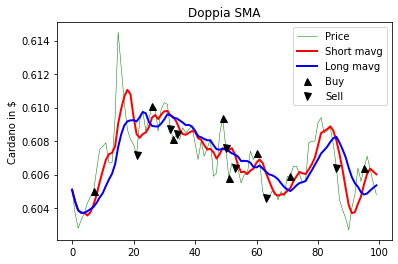

In [44]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Cardano in $')
cardano_data["close"].plot(ax=ax1, color='g', lw=.5)
ts["short_mavg"].plot(ax=ax1, color='r', lw=2.)
ts["long_mavg"].plot(ax=ax1, color='b', lw=2.)
ax1.plot(ts.loc[ts.orders== 1.0].index,
    cardano_data["close"][ts.orders == 1.0],
    '^', markersize=7, color='k')
ax1.plot(ts.loc[ts.orders== -1.0].index,
    cardano_data["close"][ts.orders == -1.0],
    'v', markersize=7, color='k')
plt.legend(["Price","Short mavg","Long mavg","Buy","Sell"])
plt.title("Doppia SMA")
plt.show()